# Affine and Perspective Transformation

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## Perspective

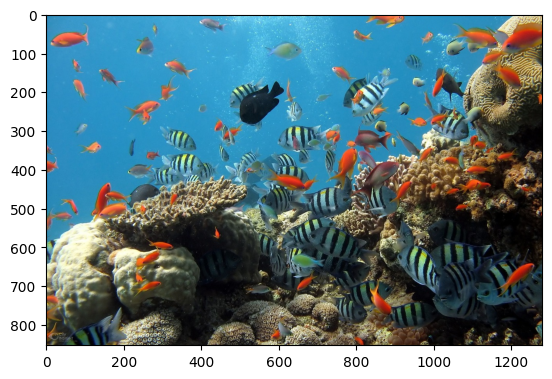

In [3]:
# Perspective Transformation 
image = cv.imread("./images/coral_reef.jpg")
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image_rgb)

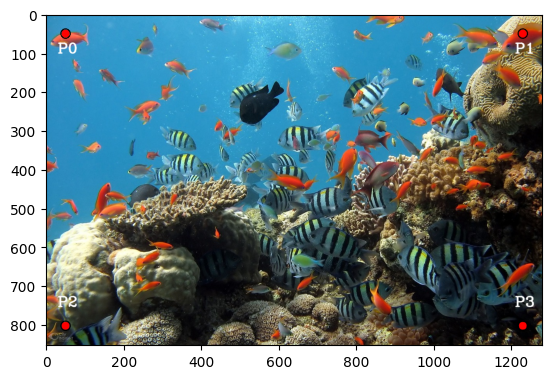

In [20]:
# Collecting information about image before processing it 
rows, cols, _ = image_rgb.shape

# For perspective transformation I need four points 
input_points = np.uint32([[50, 50], [cols - 50, 50], [50, rows - 50], [cols - 50, rows - 50]])

image_rgb_points = image_rgb.copy()
x_offset = 20
y_offset = 50

for i,point in enumerate(input_points):
    cv.circle(image_rgb_points, (point[0], point[1]) , 10, (255,0,0), -1)
    cv.circle(image_rgb_points, (point[0], point[1]) , 12, (0,0,0), 2)
    if i == 0 or i == 1:
        cv.putText(image_rgb_points,f"P{i}",
                   (point[0] - x_offset, point[1]+y_offset), 
                    cv.FONT_HERSHEY_COMPLEX,
                    1.2, (255,255,255), 2, cv.LINE_AA) 
    if i == 2 or i == 3:
        cv.putText(image_rgb_points,f"P{i}",
                   (point[0] - x_offset, point[1]-y_offset), 
                    cv.FONT_HERSHEY_COMPLEX,
                    1.2, (255,255,255), 2, cv.LINE_AA) 


plt.imshow(image_rgb_points)



In [22]:
input_points = np.float32([[50, 50], [cols - 50, 50], [50, rows - 50], [cols - 50, rows - 50]])
# define where we want to transform the points in the output image
output_points = np.float32([[10, 100], [cols - 100, 50], [100, rows - 10], [cols - 50, rows - 50]])

# Affine require a 2x3 transformation matrix, 
# while perspective alsto require a transformation matrix in the form 
'''
Transformation Matrix for Perspective Transformation is 3x3
a, b, c
d, e, f
g, h, 1

a, b, c : responsible for horizontal scaling, rotation and translation 
d, e, f : responsible for vertical scaling, rotation and translation 
g,h     : responsible for perspective component (not simple translation), 
          account for depth and skew
'''

# How to get this M matrix from input and output? 
# A built in cv method exist to compute this matrix
M = cv.getPerspectiveTransform(input_points, output_points)
print(M)
# 3x3 matrix describing the perspective transformation in the form described above

[[ 9.82020115e-01  1.24526551e-01 -4.53082772e+01]
 [-4.29364567e-02  1.02886916e+00  5.08939259e+01]
 [-9.65658377e-06  4.77687631e-05  1.00000000e+00]]


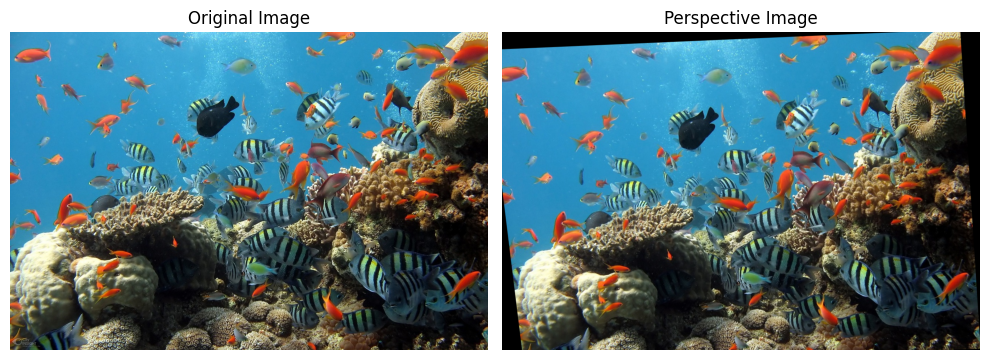

In [ ]:
# this M matrix is used to process the image as a warp transformation 
perspective_image = cv.warpPerspective(image_rgb, M, (cols, rows))

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(perspective_image)
plt.title("Perspective Image")
plt.axis('off')

plt.tight_layout()
plt.show()
# rotated and adapted image is computed 

## Affine

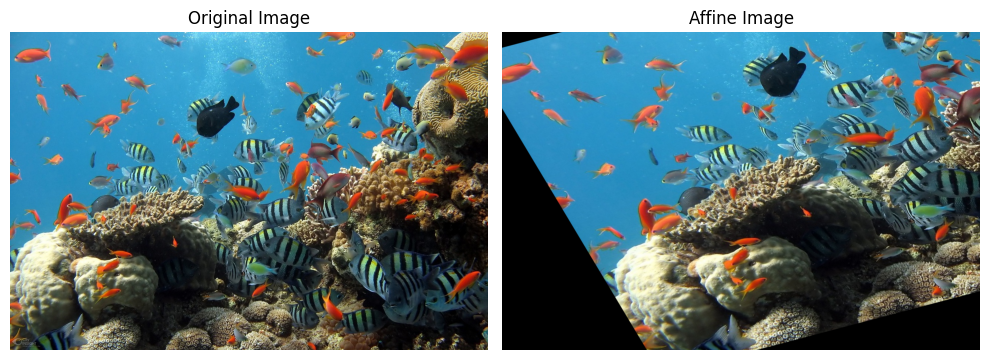

In [ ]:
# To define an affine transformation 3 points are enough 
input_points = np.float32([[50, 50], [200, 50], [50, 200]])
output_points = np.float32([[10, 100], [200, 50], [100, 250]])

# To compute affine 
M = cv.getAffineTransform(input_points, output_points)

affine_image = cv.warpAffine(image_rgb, M, (cols, rows))

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(affine_image)
plt.title("Affine Image")
plt.axis('off')

plt.tight_layout()
plt.show()

# rotated and adapted image is computed 

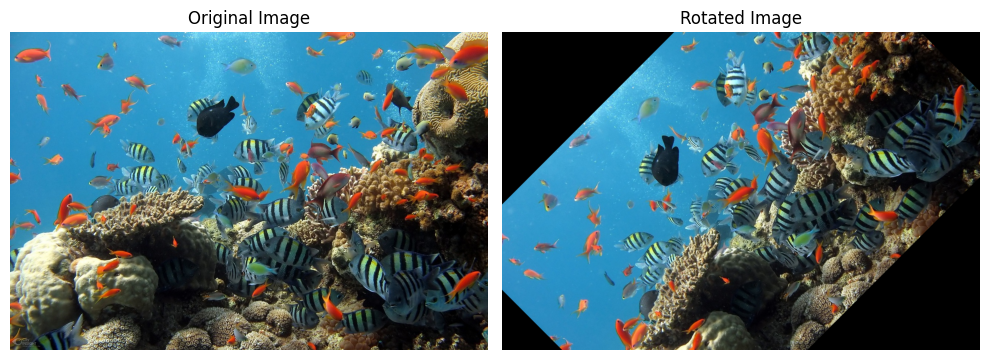

In [ ]:
# Simple transformations can be achieved with the Help of Affine transformation 

# Rotation 

angle = 45
center_of_rot = (cols//2, rows//2) # rotate around image center
scale = 1.0 # mantain scale of original image 

# To calculate transformation matrix 
M = cv.getRotationMatrix2D(center_of_rot, angle, scale)
rotated_image = cv.warpAffine(image_rgb, M, (cols, rows))

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.axis('off')

plt.tight_layout()
plt.show()

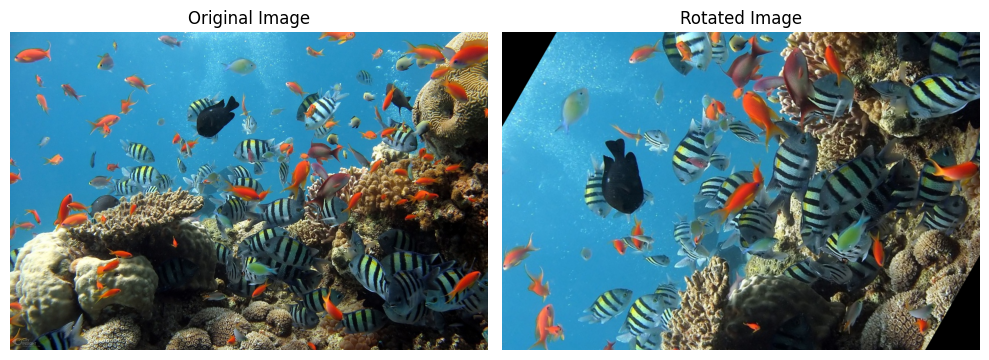

In [ ]:
# Rotation 

angle = 60
center_of_rot = (cols//2, rows//2) # rotate around image center
scale = 1.5 # rescale by 50%

# To calculate transformation matrix 
M = cv.getRotationMatrix2D(center_of_rot, angle, scale)
rotated_image = cv.warpAffine(image_rgb, M, (cols, rows))

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.axis('off')

plt.tight_layout()
plt.show()

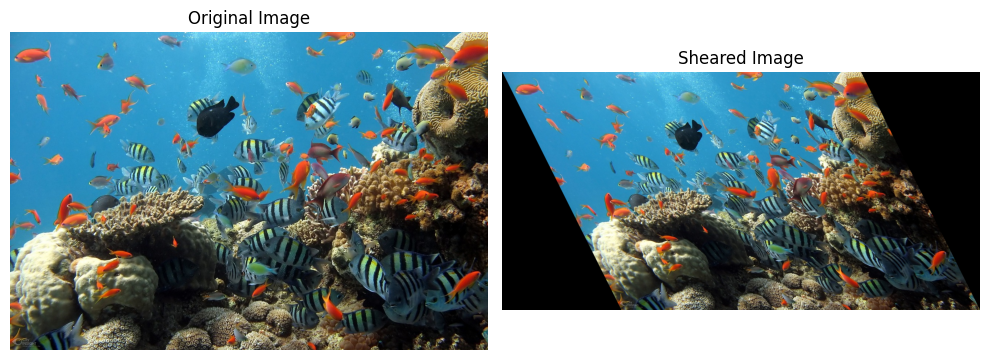

In [ ]:
# Shearing 

shear_x, shear_y = 0.5, 0

# Custom Trasformation matrix
M = np.float32([[1, shear_x, 0], 
            [shear_y, 1, 0]])

# To calculate transformation matrix 
# We are adding the requred size on the width based on the shear 
# The width increase by the shear factor * height, to keep the whole image
sheared_image = cv.warpAffine(image_rgb, M, (cols + int(shear_x * rows), rows))

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sheared_image)
plt.title("Sheared Image")
plt.axis('off')

plt.tight_layout()
plt.show()

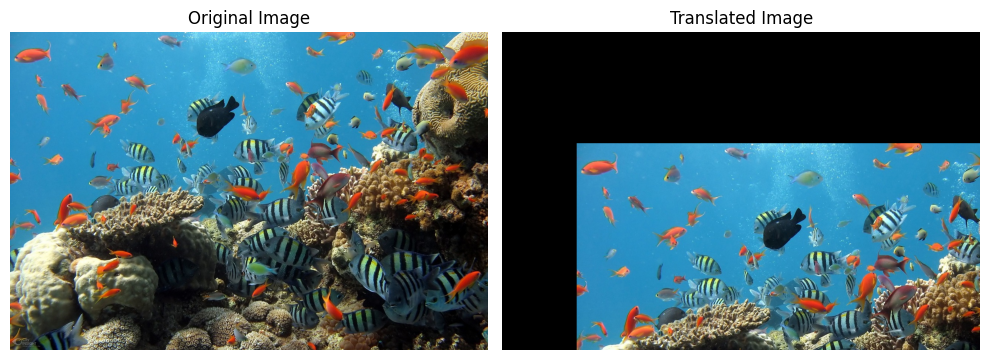

In [32]:
# Translation 

tx, ty = 200, 300

# To calculate transformation matrix 
# Custom Trasformation matrix
M = np.float32([[1, 0, tx], 
                [0, 1, ty]])

translated_image = cv.warpAffine(image_rgb, M, (cols, rows))

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(translated_image)
plt.title("Translated Image")
plt.axis('off')

plt.tight_layout()
plt.show()